In [142]:
import LowLevelFEM as FEM
using LowLevelFEM

gmsh.initialize()

In [143]:
using Plots

In [144]:
gmsh.open("transient.geo")

Info    : Reading 'transient.geo'...
Info    : Meshing 1D...
Info    : [  0%] Meshing curve 1 (Line)
Info    : [ 30%] Meshing curve 2 (Line)
Info    : [ 60%] Meshing curve 3 (Line)
Info    : [ 80%] Meshing curve 4 (Line)
Info    : Done meshing 1D (Wall 0.000408099s, CPU 0.000361s)
Info    : Meshing 2D...
Info    : Meshing surface 1 (Plane, Frontal-Delaunay)
Info    : Done meshing 2D (Wall 0.105706s, CPU 0.105006s)
Info    : 1314 nodes 2630 elements
Info    : Done reading 'transient.geo'


In [145]:
#gmsh.fltk.run()

In [146]:
body = FEM.material("body")
problem = FEM.Problem([body], type="PlaneHeatConduction")

Info    : RCMK renumbering...
Info    : Done RCMK renumbering (bandwidth is now 18)


LowLevelFEM.Problem("transient", "PlaneHeatConduction", 2, 1, LowLevelFEM.Material[LowLevelFEM.Material("body", 200000.0, 0.3, 7.85e-9, 45.0, 4.2e8, 1.2e-5)], 1.0, 1314)

In [147]:
K = FEM.heatConductionMatrix(problem)

1314×1314 SparseArrays.SparseMatrixCSC{Float64, Int64} with 8752 stored entries:
⎡⠻⣦⡀⠉⠀⠀⠸⣧⢘⠁⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢘⠀⠀⠀⠀⢠⠆⢠⠎⎤
⎢⡄⠈⠻⣦⡀⠀⠀⡳⢰⡄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⡀⠀⠀⣀⠀⢀⠰⣄⠀⠀⢰⠃⠠⠏⢠⎥
⎢⠀⠀⠀⠈⠻⣦⡀⠹⡟⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢀⠑⢃⠢⢼⠄⠀⢐⣱⡆⠀⠀⠀⠀⎥
⎢⠶⣦⢤⡠⣄⡈⡛⢌⠘⠂⠀⠀⠀⠀⠀⠀⠀⠈⠀⠀⠀⠀⠀⠀⠀⢤⠉⡀⠤⢀⣠⣳⢠⠠⣈⣱⢤⣶⣤⡖⎥
⎢⠖⠐⠐⠶⠛⠉⠲⠀⠱⣦⡀⠀⠀⠀⢠⡀⢀⠴⠆⠀⠀⠀⠀⠀⢀⡖⠊⠉⡍⠉⠻⠷⢧⣉⠛⠳⠀⠖⠀⠴⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠻⣦⡀⠀⠀⡇⣸⡁⠀⠀⠀⠀⠀⠀⢷⠀⠃⠲⢅⡒⡀⠀⡑⡼⠇⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠻⣦⡀⢹⡇⠀⠀⠀⠀⠀⠀⠀⣸⠀⢀⠀⣀⠉⡥⠢⠷⣇⡀⠂⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠲⠤⠤⣄⣈⣛⢜⣓⢂⠤⠤⠤⣄⣀⣀⣧⠂⠉⠀⢗⠀⠄⠀⢿⣮⣇⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⡀⠀⢀⡔⠖⠺⠉⠉⠹⢘⢿⣷⡄⠀⠀⠀⠀⠀⠐⡶⡏⠒⠟⠛⠭⣩⠿⠿⢿⣳⠀⣀⠀⢠⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠈⠁⠀⠀⠀⠀⠀⡇⠀⠉⠻⣦⡀⠀⠀⠀⣞⠁⠀⠀⠂⠀⠀⠀⠚⢰⠄⠸⡆⠛⡇⠈⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢧⠀⠀⠀⠈⠻⣦⡀⠀⢹⠀⠀⠀⠀⠀⠂⠀⠆⡇⠀⠀⢳⠰⢻⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢸⠀⠀⠀⠀⠀⠈⠻⣦⡞⠀⠀⠀⠀⠀⠀⠀⠈⢳⡄⠀⠘⡆⠘⡇⎥
⎢⠀⠀⠀⠠⠀⠀⠀⣄⢠⠴⠙⠓⠒⠚⠩⠛⢰⡤⠞⠙⠓⠒⠚⠉⠱⣦⡄⠀⡬⠀⢀⢄⢼⠿⠩⠄⠀⠈⠀⠁⎥
⎢⠀⠀⠀⠀⢄⠐⠃⠠⡎⠀⢩⡀⠀⠐⠃⠀⢫⠉⠀⠀⠀⠀⠀⠀⠀⠉⠻⣦⡁⢤⠀⠩⠻⢺⡿⡇⠀⠈⠀⠀⎥
⎢⠀⠀⠀⠘⠩⡐⠀⢃⡇⠉⢡⠱⡄⠘⠙⠑⣿⠁⠈⠀⠀⠀⠀⠀⠂⠋⠁⣌⠻⣦⣆⠐⣼⠉⣻⡃⠀⠀⠀⠀⎥
⎢⣀⢀⢀⡐⠒⠗⢤⣺⢿⡆⠀⠈⠡⡋⠀⠁⡇⣣⠀⠀⠈⠀⠀⠀⠀⢔⡄⡀⢈⠙⣛⢜⣳⠔⡾⣆⠀⣀⠀⣀⎥
⎢⠀⠀⠀⠙⢀⢀⠀⡒⡍⢳⣑⡬⠽⢧⡻⣷⣿⡇⢚⣀⠬⠥⢦⣀⣶⡗⣻⣂⡖⠛⢙⠞⢛⣴⡷⡟⠀⠀⠀⠙⎥
⎢⠀⠀⢀⣀⠱⠾⢆⣸⢿⡀⠉⠁⠠⠈⠉⠙⢿⣳⣀⡁⠀⠀⠀⠉⠃⠆⠿⠯⠿⠺⠺⢯⣽⠯⠿⢇⠀⣐⡀⢀⎥
⎢⠠⠖⠉⡀⠀⠀⢠⣷⢠⠄⠀⠀⠀⠀⠀⠀⠀⢠⣬⠉⢙⡒⠲⠤⡀⠀⡀⠀⠀⠀⠀⢠⠀⠀⢀⢠⣑⣼⢝⣦⎥
⎣⡠⠖⠋⣁⠀⠀⢠⠿⢀⡄⠀⠀⠀⠀⠀⠀⠀⣀⡉⠉⠛⠒⠶⠤⠄⠀⠀⠀⠀⠀⠀⢠⣄⠀⠀⢈⠳⣵⠑⢄⎦

In [148]:
C = FEM.heatCapacityMatrix(problem)

1314×1314 SparseArrays.SparseMatrixCSC{Float64, Int64} with 8752 stored entries:
⎡⠻⣦⡀⠉⠀⠀⠸⣧⢘⠁⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢘⠀⠀⠀⠀⢠⠆⢠⠎⎤
⎢⡄⠈⠻⣦⡀⠀⠀⡳⢰⡄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⡀⠀⠀⣀⠀⢀⠰⣄⠀⠀⢰⠃⠠⠏⢠⎥
⎢⠀⠀⠀⠈⠻⣦⡀⠹⡟⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢀⠑⢃⠢⢼⠄⠀⢐⣱⡆⠀⠀⠀⠀⎥
⎢⠶⣦⢤⡠⣄⡈⡛⢌⠘⠂⠀⠀⠀⠀⠀⠀⠀⠈⠀⠀⠀⠀⠀⠀⠀⢤⠉⡀⠤⢀⣠⣳⢠⠠⣈⣱⢤⣶⣤⡖⎥
⎢⠖⠐⠐⠶⠛⠉⠲⠀⠱⣦⡀⠀⠀⠀⢠⡀⢀⠴⠆⠀⠀⠀⠀⠀⢀⡖⠊⠉⡍⠉⠻⠷⢧⣉⠛⠳⠀⠖⠀⠴⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠻⣦⡀⠀⠀⡇⣸⡁⠀⠀⠀⠀⠀⠀⢷⠀⠃⠲⢅⡒⡀⠀⡑⡼⠇⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠻⣦⡀⢹⡇⠀⠀⠀⠀⠀⠀⠀⣸⠀⢀⠀⣀⠉⡥⠢⠷⣇⡀⠂⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠲⠤⠤⣄⣈⣛⢜⣓⢂⠤⠤⠤⣄⣀⣀⣧⠂⠉⠀⢗⠀⠄⠀⢿⣮⣇⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⡀⠀⢀⡔⠖⠺⠉⠉⠹⢘⢿⣷⡄⠀⠀⠀⠀⠀⠐⡶⡏⠒⠟⠛⠭⣩⠿⠿⢿⣳⠀⣀⠀⢠⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠈⠁⠀⠀⠀⠀⠀⡇⠀⠉⠻⣦⡀⠀⠀⠀⣞⠁⠀⠀⠂⠀⠀⠀⠚⢰⠄⠸⡆⠛⡇⠈⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢧⠀⠀⠀⠈⠻⣦⡀⠀⢹⠀⠀⠀⠀⠀⠂⠀⠆⡇⠀⠀⢳⠰⢻⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢸⠀⠀⠀⠀⠀⠈⠻⣦⡞⠀⠀⠀⠀⠀⠀⠀⠈⢳⡄⠀⠘⡆⠘⡇⎥
⎢⠀⠀⠀⠠⠀⠀⠀⣄⢠⠴⠙⠓⠒⠚⠩⠛⢰⡤⠞⠙⠓⠒⠚⠉⠱⣦⡄⠀⡬⠀⢀⢄⢼⠿⠩⠄⠀⠈⠀⠁⎥
⎢⠀⠀⠀⠀⢄⠐⠃⠠⡎⠀⢩⡀⠀⠐⠃⠀⢫⠉⠀⠀⠀⠀⠀⠀⠀⠉⠻⣦⡁⢤⠀⠩⠻⢺⡿⡇⠀⠈⠀⠀⎥
⎢⠀⠀⠀⠘⠩⡐⠀⢃⡇⠉⢡⠱⡄⠘⠙⠑⣿⠁⠈⠀⠀⠀⠀⠀⠂⠋⠁⣌⠻⣦⣆⠐⣼⠉⣻⡃⠀⠀⠀⠀⎥
⎢⣀⢀⢀⡐⠒⠗⢤⣺⢿⡆⠀⠈⠡⡋⠀⠁⡇⣣⠀⠀⠈⠀⠀⠀⠀⢔⡄⡀⢈⠙⣛⢜⣳⠔⡾⣆⠀⣀⠀⣀⎥
⎢⠀⠀⠀⠙⢀⢀⠀⡒⡍⢳⣑⡬⠽⢧⡻⣷⣿⡇⢚⣀⠬⠥⢦⣀⣶⡗⣻⣂⡖⠛⢙⠞⢛⣴⡷⡟⠀⠀⠀⠙⎥
⎢⠀⠀⢀⣀⠱⠾⢆⣸⢿⡀⠉⠁⠠⠈⠉⠙⢿⣳⣀⡁⠀⠀⠀⠉⠃⠆⠿⠯⠿⠺⠺⢯⣽⠯⠿⢇⠀⣐⡀⢀⎥
⎢⠠⠖⠉⡀⠀⠀⢠⣷⢠⠄⠀⠀⠀⠀⠀⠀⠀⢠⣬⠉⢙⡒⠲⠤⡀⠀⡀⠀⠀⠀⠀⢠⠀⠀⢀⢠⣑⣼⢝⣦⎥
⎣⡠⠖⠋⣁⠀⠀⢠⠿⢀⡄⠀⠀⠀⠀⠀⠀⠀⣀⡉⠉⠛⠒⠶⠤⠄⠀⠀⠀⠀⠀⠀⢠⣄⠀⠀⢈⠳⣵⠑⢄⎦

In [149]:
left = FEM.temperatureConstraint("left", T=0)
right = FEM.temperatureConstraint("right", T=100)
hf = FEM.heatFlux("left", qn=0)

("left", 0, 0, 0)

In [150]:
q0 = zeros(problem.non)

1314-element Vector{Float64}:
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 ⋮
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0

In [151]:
FEM.applyBoundaryConditions!(problem, K, C, q0, [left, right])

In [152]:
T0 = zeros(problem.non)

1314-element Vector{Float64}:
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 ⋮
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0

In [153]:
λₘᵢₙ = FEM.smallestEigenValue(K, C)

0.013471652436778959

In [154]:
λₘₐₓ = FEM.largestEigenValue(K, C)

389.523390427559

In [155]:
ϑ = 1
Δt = 2 / ((1 - 2ϑ) * λₘₐₓ)
Δt = 2 / ((1 - 2 * 0.49) * λₘₐₓ)

0.25672399259575984

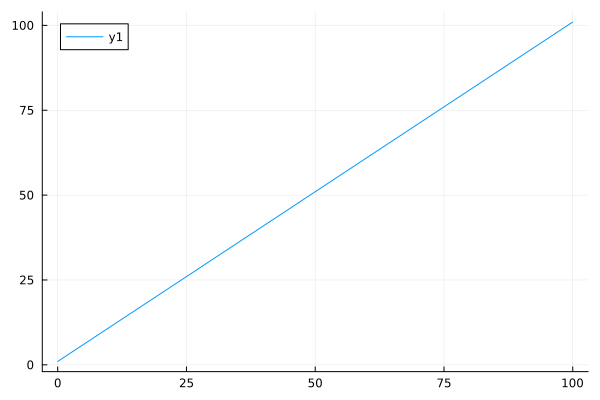

In [156]:
xy = FEM.FDMaccuracyAnalysis(λₘᵢₙ, λₘₐₓ, Δt, ϑ=ϑ)
plot(xy)

In [157]:
T, t = FEM.FDM(K, C, q0, T0, 1000 * Δt, Δt, ϑ=ϑ)

([0.0 0.0 … 0.0 0.0; 0.0 20.42803305326392 … 99.99999999999999 99.99999999999999; … ; 0.0 1.2031838234704274e-21 … 2.087730088848345 2.0882196602703234; 0.0 31.008702261546215 … 97.60560105086653 97.60609540357206], [0.0, 0.25672399259575984, 0.5134479851915197, 0.7701719777872795, 1.0268959703830394, 1.2836199629787992, 1.540343955574559, 1.797067948170319, 2.0537919407660787, 2.3105159333618386  …  254.15675266980708, 254.41347666240284, 254.6702006549986, 254.92692464759438, 255.18364864019014, 255.4403726327859, 255.69709662538168, 255.95382061797744, 256.2105446105732, 256.467268603169])

In [158]:
T1 = FEM.showDoFResults(problem, T, "T", t=t, visible=true);

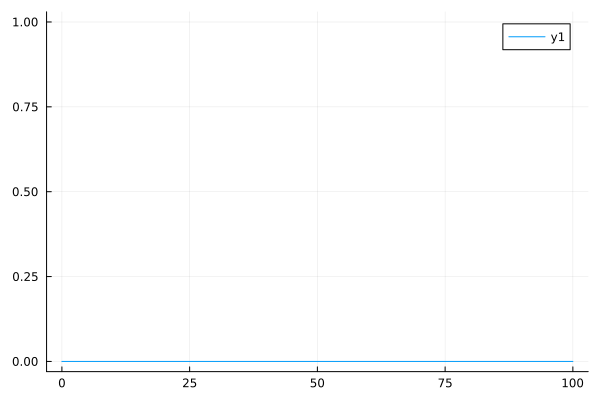

In [159]:
p1, xy = FEM.plotOnPath(problem, "path", T1, plot=true)
plot(xy)

In [160]:
gmsh.fltk.run()

-------------------------------------------------------
Version       : 4.13.1
License       : GNU General Public License
Build OS      : Linux64-sdk
Build date    : 19700101
Build host    : amdci7.julia.csail.mit.edu
Build options : 64Bit ALGLIB[contrib] ANN[contrib] Bamg Blossom Cairo DIntegration Dlopen DomHex Eigen[contrib] Fltk GMP Gmm[contrib] Hxt Jpeg Kbipack LinuxJoystick MathEx[contrib] Mesh Metis[contrib] Mmg Mpeg Netgen Nii2mesh ONELAB ONELABMetamodel OpenCASCADE OpenCASCADE-CAF OpenGL OpenMP OptHom Parser Plugins Png Post QuadMeshingTools QuadTri Solver TetGen/BR TinyXML2[contrib] Untangle Voro++[contrib] WinslowUntangler Zlib
FLTK version  : 1.3.8
OCC version   : 7.7.2
Packaged by   : root
Web site      : https://gmsh.info
Issue tracker : https://gitlab.onelab.info/gmsh/gmsh/issues
-------------------------------------------------------


XRequest.18: BadValue 0x0


In [161]:
gmsh.finalize()